# Brazilian E-Commerce Public Dataset by Olist

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#com2.to_csv('order_review.csv',index=False)

In [3]:
# import pandas as pd
# from sklearn.linear_model import LinearRegression

In [4]:
# ''''
# # Example data
# data = pd.DataFrame({
#     'SquareFeet': [1000, 1500, 2000, 2500, 3000],
#     'Price': [200000, 250000, 300000, 350000, 400000]
# })

# X = data[['SquareFeet']]   # independent variable
# y = data['Price']          # dependent variable

# # Train model
# model = LinearRegression()
# model.fit(X, y)

# # Predict for a new house
# prediction = model.predict([[2200]])
# print("Predicted price:", prediction[0]); 

# ''''

# Brazilian E-Commerce Public Dataset by Olist

In [5]:
# pip install pandas numpy matplotlib seaborn scikit-learn jupyterlab python-dateutil nltk tqdm
# pip install haversine
# This is a one time installation on machine.

In [6]:
# IMPORTING FILES
import pandas as pd
import numpy as np

orders = pd.read_csv('olist_orders_dataset.csv')
items  = pd.read_csv('olist_order_items_dataset.csv')
payments = pd.read_csv('olist_order_payments_dataset.csv')
reviews = pd.read_csv('olist_order_reviews_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geo = pd.read_csv('olist_geolocation_dataset.csv')
cat_trans = pd.read_csv('product_category_name_translation.csv')

In [7]:
# QUICK CHECKS
for df,name in [(orders,'Orders'),(items,'Items'),(payments,'Payments'),(reviews,'Reviews'),(customers,'Customers'),(products,'Products'),(sellers,'Sellers')]:
    print(name, df.shape)
    print(df.dtypes.head())
    print(df.isnull().sum().sort_values(ascending=False).head(5),'\n NULL Percentage', df.isnull().sum().sort_values(ascending=False)/(df.shape[0])*100,'\n')

Orders (99441, 8)
order_id                    object
customer_id                 object
order_status                object
order_purchase_timestamp    object
order_approved_at           object
dtype: object
order_delivered_customer_date    2965
order_delivered_carrier_date     1783
order_approved_at                 160
order_id                            0
order_purchase_timestamp            0
dtype: int64 
 NULL Percentage order_delivered_customer_date    2.981668
order_delivered_carrier_date     1.793023
order_approved_at                0.160899
order_id                         0.000000
order_purchase_timestamp         0.000000
order_status                     0.000000
customer_id                      0.000000
order_estimated_delivery_date    0.000000
dtype: float64 

Items (112650, 7)
order_id               object
order_item_id           int64
product_id             object
seller_id              object
shipping_limit_date    object
dtype: object
order_id               0
order_item_i

### Checking ORDERS

In [8]:
orders.head(4)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00


In [9]:
orders['order_status'].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

In [10]:
orders['order_id'].duplicated().sum()

np.int64(0)

In [11]:
# Data type conversion
date_cols = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date',
             'order_delivered_customer_date','order_estimated_delivery_date']
for c in date_cols:
    orders[c] = pd.to_datetime(orders[c], errors='coerce')


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


### Checking ITEMS

In [13]:
items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [14]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [16]:
items['order_item_id'].value_counts()

order_item_id
1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: count, dtype: int64

In [17]:
order_amt = items.groupby(['order_id']).agg(
    items_price_sum = ('price','sum'),
    freight_sum = ('freight_value','sum'),
    n_items = ('order_item_id','count')
).reset_index()

order_amt

,order_id,items_price_sum,freight_sum,n_items
0,00010242fe8c5a6d1ba2dd792cb16214,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,199.90,18.14,1
...,...,...,...,...
98661,fffc94f6ce00a00581880bf54a75a037,299.99,43.41,1
98662,fffcd46ef2263f404302a634eb57f7eb,350.00,36.53,1
98663,fffce4705a9662cd70adb13d4a31832d,99.90,16.95,1
98664,fffe18544ffabc95dfada21779c9644f,55.99,8.72,1


In [18]:
order_amt.sort_values(by= 'n_items',ascending=False)

,order_id,items_price_sum,freight_sum,n_items
50137,8272b63d03f5f79c56e9e4120aec44ef,31.80,164.37,21
10459,1b15974a0141d54e36626dca3fdc731a,2000.00,202.40,20
65715,ab14fdcfbe524636d65ee38360e22ce8,1974.00,288.80,20
60941,9ef13efd6949e4573a18964dd1bbe7f5,765.00,18.00,15
25583,428a2f660dc84138d969ccd69a0ab6d5,982.35,243.30,15
...,...,...,...,...
98645,fff1e3e76b816bfe8ef16678cc53c643,65.99,20.86,1
98646,fff2cdc825f9fc0ba3c04227cfa02303,24.99,25.63,1
98647,fff2e9e3aa8644e19710216b4ef53ab2,69.90,16.25,1
98648,fff3983dfa3c5a0d752d8d17baa406a0,66.39,14.05,1


### Checking PAYMENTS

In [19]:
payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [20]:
payments['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

In [21]:
payments.groupby(['payment_type'])['payment_value'].sum().sort_values(ascending=False)

payment_type
credit_card    12542084.19
boleto          2869361.27
voucher          379436.87
debit_card       217989.79
not_defined           0.00
Name: payment_value, dtype: float64

In [22]:
payments[payments['payment_value']==0]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


In [23]:
payments_agg = payments.groupby('order_id').agg(
    payment_value_sum=('payment_value','sum'),
    payment_type_mode = ('payment_type', lambda x: x.mode().iat[0] if not x.mode().empty else np.nan)
).reset_index()
# here mode() gives us the most occured value and if there are multiple of it, iat[0] will give us the 1st value from it.

payments_agg

,order_id,payment_value_sum,payment_type_mode
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,credit_card
1,00018f77f2f0320c557190d7a144bdd3,259.83,credit_card
2,000229ec398224ef6ca0657da4fc703e,216.87,credit_card
3,00024acbcdf0a6daa1e931b038114c75,25.78,credit_card
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,credit_card
...,...,...,...
99435,fffc94f6ce00a00581880bf54a75a037,343.40,boleto
99436,fffcd46ef2263f404302a634eb57f7eb,386.53,boleto
99437,fffce4705a9662cd70adb13d4a31832d,116.85,credit_card
99438,fffe18544ffabc95dfada21779c9644f,64.71,credit_card


In [24]:
payments_agg['payment_type_mode'].value_counts()

payment_type_mode
credit_card    76132
boleto         19784
voucher         1994
debit_card      1527
not_defined        3
Name: count, dtype: int64

### Checking REVIEWS

In [25]:
reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [26]:
x=reviews.drop(columns=['review_comment_title','review_comment_message'])
x

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


In [27]:
x['review_id'].nunique()

98410

In [28]:
x['order_id'].nunique()

98673

In [29]:
x['review_id'].duplicated().sum()

np.int64(814)

In [30]:
x['order_id'].duplicated().sum()

np.int64(551)

In [31]:
x.drop_duplicates(subset=['review_id','order_id'], inplace=True)
x

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01 00:00:00,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07 00:00:00,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01 00:00:00,2018-07-02 12:59:13


In [32]:
reviews=x


In [33]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [34]:
reviews['review_creation_date']=pd.to_datetime(reviews['review_creation_date'], errors='coerce')
reviews['review_answer_timestamp']=pd.to_datetime(reviews['review_answer_timestamp'], errors='coerce')

In [35]:
reviews['x']=(reviews['review_answer_timestamp']-reviews['review_creation_date'])

In [36]:
rd=reviews['review_answer_timestamp'].dt.weekday.value_counts()
rd

review_answer_timestamp
4    16591
3    15887
2    15306
0    14496
5    12875
6    12472
1    11597
Name: count, dtype: int64

In [37]:
reviews['review_score'].value_counts()

review_score
5    57328
4    19142
1    11424
3     8179
2     3151
Name: count, dtype: int64

In [38]:
reviews.drop(reviews.columns[6:],axis=1,inplace=True) # To clear multiple columns usig index.

In [39]:
reviews

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp,x
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59,0 days 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13,1 days 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24,1 days 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06,0 days 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53,1 days 10:26:53
...,...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30,7 days 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42,2 days 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43,1 days 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13,1 days 12:59:13


### Checking CUSTOMERS

In [40]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [41]:
customers['customer_unique_id'].duplicated().sum()

np.int64(3345)

In [42]:
customers.groupby(['customer_city'])['customer_city'].value_counts().sort_values(ascending=False)

customer_city
sao paulo         15540
rio de janeiro     6882
belo horizonte     2773
brasilia           2131
curitiba           1521
                  ...  
agisse                1
vieiras               1
bertopolis            1
abadiania             1
xexeu                 1
Name: count, Length: 4119, dtype: int64

In [43]:
customers['customer_state'].value_counts()

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: count, dtype: int64

In [44]:
customers.groupby(by=['customer_state'])['customer_city'].count().sort_values(ascending=False)

customer_state
SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
DF     2140
ES     2033
GO     2020
PE     1652
CE     1336
PA      975
MT      907
MA      747
MS      715
PB      536
PI      495
RN      485
AL      413
SE      350
TO      280
RO      253
AM      148
AC       81
AP       68
RR       46
Name: customer_city, dtype: int64

In [45]:
pd.set_option("display.max_column", None)  

In [46]:
# pd.reset_option('all')

## PRODUCTS



In [47]:
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [48]:
products.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [49]:
products.shape

(32951, 9)

In [50]:
products['product_category_name'].nunique()

73

In [51]:
products['product_category_name'].value_counts()

product_category_name
cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: count, Length: 73, dtype: int64

## SELLERS

In [52]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [53]:
sellers.shape

(3095, 4)

In [54]:
sellers['seller_state'].nunique()

23

In [55]:
sellers.groupby(['seller_state']).agg(seller_city= ('seller_city', 'count')).sort_values(by='seller_city', ascending=False)

,seller_city
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


In [56]:
sellers['seller_city'].value_counts(ascending=False).head(20)

seller_city
sao paulo                694
curitiba                 127
rio de janeiro            96
belo horizonte            68
ribeirao preto            52
guarulhos                 50
ibitinga                  49
santo andre               45
campinas                  41
maringa                   40
sao jose do rio preto     33
sorocaba                  32
sao bernardo do campo     32
osasco                    32
porto alegre              28
brasilia                  28
londrina                  26
goiania                   23
joinville                 22
blumenau                  21
Name: count, dtype: int64

In [57]:
geo

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP
...,...,...,...,...,...
1000158,99950,-28.068639,-52.010705,tapejara,RS
1000159,99900,-27.877125,-52.224882,getulio vargas,RS
1000160,99950,-28.071855,-52.014716,tapejara,RS
1000161,99980,-28.388932,-51.846871,david canabarro,RS


In [58]:
cat_trans

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## MERGING

In [59]:
orders = orders.merge(order_amt, on='order_id', how='left')
orders = orders.merge(payments_agg, on='order_id', how='left')
orders = orders.merge(reviews[['order_id','review_score']], on='order_id', how='left')
orders = orders.merge(customers, on='customer_id', how='left')

In [60]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,1.0,179.12,credit_card,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,1.0,72.20,credit_card,5.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,1.0,28.62,credit_card,5.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00,13.08,1.0,85.08,credit_card,5.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90,20.10,1.0,195.00,credit_card,4.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99,65.02,1.0,271.01,credit_card,5.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98,81.18,2.0,441.16,credit_card,2.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ


In [61]:
# delivery time (days)
orders['delivery_time_days'] = (orders['order_delivered_customer_date'] - orders['order_purchase_timestamp']).dt.total_seconds() / 86400

In [62]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.782037
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,1.0,179.12,credit_card,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9.394213
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,1.0,72.20,credit_card,5.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.208750
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,1.0,28.62,credit_card,5.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2.873877
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00,13.08,1.0,85.08,credit_card,5.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,8.218009
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90,20.10,1.0,195.00,credit_card,4.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,22.193727
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99,65.02,1.0,271.01,credit_card,5.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,24.859421
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98,81.18,2.0,441.16,credit_card,2.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,17.086424


In [63]:
orders.head(2)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.436574
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.782037


In [64]:
# estimated delta (actual - estimated)
orders['delivery_delay_days'] = (orders['order_delivered_customer_date'] - orders['order_estimated_delivery_date']).dt.total_seconds() / 86400
orders['is_delayed'] = orders['delivery_delay_days'] > 0


In [65]:
# order total (use payment if present else price+freight)
orders['order_value'] = np.where(orders['payment_value_sum'].notna(), orders['payment_value_sum'], orders['items_price_sum'] + orders['freight_sum'])


In [66]:
# repeat customer flag (compute per customer)
cust_orders = orders.groupby('customer_id')['order_id'].nunique().reset_index(name='order_count')
orders = orders.merge(cust_orders, on='customer_id', how='left')
orders['is_repeat_cust'] = orders['order_count'] > 1


## Average lat/lon per zip code prefix

In [67]:
geo_agg = geo.groupby('geolocation_zip_code_prefix').agg({'geolocation_lat':'mean','geolocation_lng':'mean'}).reset_index()
geo_agg.rename(columns={'geolocation_zip_code_prefix':'zip_prefix','geolocation_lat':'lat','geolocation_lng':'lon'}, inplace=True)

In [68]:
geo_agg

,zip_prefix,lat,lon
0,1001,-23.550190,-46.634024
1,1002,-23.548146,-46.634979
2,1003,-23.548994,-46.635731
3,1004,-23.549799,-46.634757
4,1005,-23.549456,-46.636733
...,...,...,...
19010,99960,-27.953722,-52.025511
19011,99965,-28.183372,-52.039850
19012,99970,-28.343766,-51.874689
19013,99980,-28.389129,-51.843836


In [69]:
# map customer zip -> latlon
orders = orders.merge(geo_agg, left_on='customer_zip_code_prefix', right_on='zip_prefix', how='left')
orders.rename(columns={'lat':'cust_lat','lon':'cust_lon'}, inplace=True)

In [70]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days,delivery_delay_days,is_delayed,order_value,order_count,is_repeat_cust,zip_prefix,cust_lat,cust_lon
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.436574,-7.107488,False,38.71,1,False,3149.0,-23.576983,-46.587161
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.782037,-5.355729,False,141.46,1,False,47813.0,-12.177924,-44.660711
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,1.0,179.12,credit_card,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9.394213,-17.245498,False,179.12,1,False,75265.0,-16.745150,-48.514783
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,1.0,72.20,credit_card,5.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.208750,-12.980069,False,72.20,1,False,59296.0,-5.774190,-35.271143
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,1.0,28.62,credit_card,5.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2.873877,-9.238171,False,28.62,1,False,9195.0,-23.676370,-46.514627


In [71]:
# sellers lat|lon
sellers = sellers.merge(geo_agg, 
                        left_on='seller_zip_code_prefix', 
                        right_on='zip_prefix', 
                        how='left').rename(columns={'lat':'seller_lat','lon':'seller_lon'})

items_s = items.merge(sellers[['seller_id','seller_lat','seller_lon','seller_zip_code_prefix']], on='seller_id', how='left')

In [72]:
items_s.head(1)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_lat,seller_lon,seller_zip_code_prefix
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,-22.496953,-44.127492,27277


In [73]:
# join with customers' lat|lon via orders mapping
items_s = items_s.merge(orders[['order_id','cust_lat','cust_lon']], on='order_id', how='left')
items_s

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,seller_lat,seller_lon,seller_zip_code_prefix,cust_lat,cust_lon
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,-22.496953,-44.127492,27277,-21.762775,-41.309633
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,-23.565096,-46.518565,3471,-20.220527,-50.903424
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,-22.262584,-46.171124,37564,-19.870305,-44.593326
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,-20.553624,-47.387359,14403,-23.089925,-46.611654
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,-22.929384,-53.135873,87900,-23.243402,-46.827614
...,...,...,...,...,...,...,...,...,...,...,...,...
113309,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,-26.912574,-48.673980,88303,-2.497993,-44.297761
113310,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,-23.535864,-46.642819,1206,-25.566904,-49.309115
113311,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,-25.469955,-49.289821,80610,-23.597794,-46.643923
113312,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,-23.635530,-46.694031,4733,-23.040252,-46.979782


In [74]:
# pip install haversine

In [75]:
from haversine import haversine

In [76]:
def hav_dist(x):
    if pd.notnull(x['cust_lat']) and pd.notnull(x['seller_lat']):
        return haversine((x['cust_lat'], x['cust_lon']), (x['seller_lat'], x['seller_lon']))
    return np.nan


In [77]:
items_s['dist_km'] = items_s.apply(hav_dist, axis=1)
order_dist = items_s.groupby('order_id')['dist_km'].mean().reset_index(name='avg_seller_distance_km')
orders = orders.merge(order_dist, on='order_id', how='left')

In [78]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days,delivery_delay_days,is_delayed,order_value,order_count,is_repeat_cust,zip_prefix,cust_lat,cust_lon,avg_seller_distance_km
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.436574,-7.107488,False,38.71,1,False,3149.0,-23.576983,-46.587161,18.576135
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.782037,-5.355729,False,141.46,1,False,47813.0,-12.177924,-44.660711,851.496245
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,1.0,179.12,credit_card,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9.394213,-17.245498,False,179.12,1,False,75265.0,-16.745150,-48.514783,514.411377
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,1.0,72.20,credit_card,5.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.208750,-12.980069,False,72.20,1,False,59296.0,-5.774190,-35.271143,1822.228853
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,1.0,28.62,credit_card,5.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2.873877,-9.238171,False,28.62,1,False,9195.0,-23.676370,-46.514627,29.676666


In [79]:
# 1* Distribution of delivery_delay_days (histogram + percent delayed)
# 2* Average review_score by delay bins
# 3* Revenue by state / category over time
# 4* Repeat rate and average order value for repeat vs new customers
# 5* Correlation matrix (delivery_delay_days, order_value, review_score, avg_seller_distance_km)

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

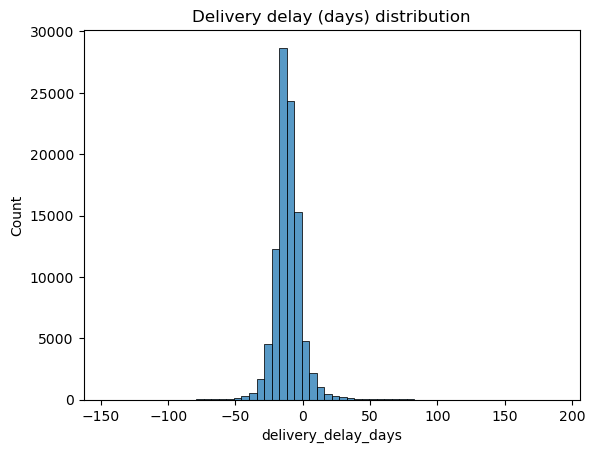

In [81]:
# 1* Distribution of delivery_delay_days (histogram + percent delayed)

sns.histplot(orders['delivery_delay_days'].dropna(), bins=60)
plt.title('Delivery delay (days) distribution');

C:\Users\Om Tyagi\AppData\Local\Temp\ipykernel_2660\133770912.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('delay_bucket')['review_score'].mean().plot(kind='bar')


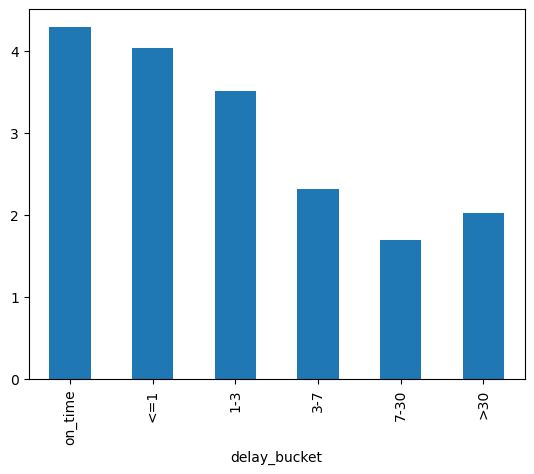

In [82]:
# 2* Average review_score by delay bins

# mean review by delay bucket
orders['delay_bucket'] = pd.cut(orders['delivery_delay_days'], bins=[-999,0,1,3,7,30,999], labels=['on_time','<=1','1-3','3-7','7-30','>30'])
orders.groupby('delay_bucket')['review_score'].mean().plot(kind='bar')
plt.show()

In [83]:
# How much do deliveries deviate from estimates (median/mean/percent delayed)?

orders['is_delayed'].mean() # percent delayed.

orders['delivery_delay_days'].median()

-11.952164351851852

In [84]:
# Does delay reduce review score?

orders[['delivery_delay_days','review_score']].corr().iloc[0,1]

orders.groupby('delay_bucket')['review_score'].agg(['mean','count'])

C:\Users\Om Tyagi\AppData\Local\Temp\ipykernel_2660\1406349940.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  orders.groupby('delay_bucket')['review_score'].agg(['mean','count'])


,mean,count
delay_bucket,,
on_time,4.293578,88658
<=1,4.033308,1291
1-3,3.511029,1360
3-7,2.316263,1777
7-30,1.697063,2928
>30,2.023188,345


In [85]:
# Which states / cities have worst delivery performance?

orders.groupby('customer_state')['delivery_delay_days'].median().sort_values(ascending=False).head(10)

customer_state
AL    -9.583843
MA   -10.015660
SP   -10.286227
ES   -11.144595
MS   -11.397656
BA   -11.572141
DF   -11.993843
SC   -12.078785
SE   -12.127338
RJ   -12.254028
Name: delivery_delay_days, dtype: float64

In [86]:
products.columns

Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')

In [87]:
items.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='object')

In [88]:
# Top product categories by revenue and repeat rate
# joining items products product_category_name

category_revenue = items.merge(products).groupby('product_category_name')['price'].sum()

In [89]:
category_revenue

product_category_name
agro_industria_e_comercio     72530.47
alimentos                     29393.41
alimentos_bebidas             15179.48
artes                         24202.64
artes_e_artesanato             1814.01
                               ...    
sinalizacao_e_seguranca       21509.23
tablets_impressao_imagem       7528.41
telefonia                    323667.53
telefonia_fixa                59583.00
utilidades_domesticas        632248.66
Name: price, Length: 73, dtype: float64

In [90]:
# Does buyer–seller distance predict delay?

orders[['avg_seller_distance_km','delivery_time_days']].dropna().corr()

,avg_seller_distance_km,delivery_time_days
avg_seller_distance_km,1.000000,0.393792
delivery_time_days,0.393792,1.000000


In [91]:
# Which payment types are associated with higher AOV or higher delay?

orders.groupby('payment_type_mode')['order_value'].mean()

payment_type_mode
boleto         144.986413
credit_card    166.381215
debit_card     142.549628
not_defined      0.000000
voucher        120.590845
Name: order_value, dtype: float64

In [92]:
# Customer segmentation (3 segments): low value / occasional / high LTV

cust_summary = orders.groupby('customer_id').agg({'order_value':'sum','order_id':'count','delivery_time_days':'mean'})

# run KMeans(n_clusters=3) on standardized features.

In [93]:
cust_summary

,order_value,order_id,delivery_time_days
customer_id,,,
00012a2ce6f8dcda20d059ce98491703,114.74,1,13.981296
000161a058600d5901f007fab4c27140,67.41,1,9.386817
0001fd6190edaaf884bcaf3d49edf079,195.42,1,5.910486
0002414f95344307404f0ace7a26f1d5,179.35,1,28.289375
000379cdec625522490c315e70c7a9fb,107.01,1,11.276979
...,...,...,...
fffecc9f79fd8c764f843e9951b11341,81.36,1,12.014850
fffeda5b6d849fbd39689bb92087f431,63.13,1,17.185752
ffff42319e9b2d713724ae527742af25,214.13,1,5.066667


In [94]:
orders.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'items_price_sum', 'freight_sum', 'n_items', 'payment_value_sum',
       'payment_type_mode', 'review_score', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'delivery_time_days', 'delivery_delay_days', 'is_delayed',
       'order_value', 'order_count', 'is_repeat_cust', 'zip_prefix',
       'cust_lat', 'cust_lon', 'avg_seller_distance_km', 'delay_bucket'],
      dtype='object')

# Sentiment / reviews

In [95]:
# orders['complains_about_delay'] = orders['review_comment_message'].str.contains('atras', case=False, na=False)
# orders.groupby('complains_about_delay')['review_score'].mean()


In [96]:
orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,items_price_sum,freight_sum,n_items,payment_value_sum,payment_type_mode,review_score,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,delivery_time_days,delivery_delay_days,is_delayed,order_value,order_count,is_repeat_cust,zip_prefix,cust_lat,cust_lon,avg_seller_distance_km,delay_bucket
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,29.99,8.72,1.0,38.71,voucher,4.0,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,8.436574,-7.107488,False,38.71,1,False,3149.0,-23.576983,-46.587161,18.576135,on_time
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,118.70,22.76,1.0,141.46,boleto,4.0,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,13.782037,-5.355729,False,141.46,1,False,47813.0,-12.177924,-44.660711,851.496245,on_time
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,159.90,19.22,1.0,179.12,credit_card,5.0,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,9.394213,-17.245498,False,179.12,1,False,75265.0,-16.745150,-48.514783,514.411377,on_time
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,45.00,27.20,1.0,72.20,credit_card,5.0,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,13.208750,-12.980069,False,72.20,1,False,59296.0,-5.774190,-35.271143,1822.228853,on_time
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,19.90,8.72,1.0,28.62,credit_card,5.0,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,2.873877,-9.238171,False,28.62,1,False,9195.0,-23.676370,-46.514627,29.676666,on_time
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99987,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,72.00,13.08,1.0,85.08,credit_card,5.0,6359f309b166b0196dbf7ad2ac62bb5a,12209,sao jose dos campos,SP,8.218009,-10.369433,False,85.08,1,False,12209.0,-23.178000,-45.883818,69.755160,on_time
99988,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,174.90,20.10,1.0,195.00,credit_card,4.0,da62f9e57a76d978d02ab5362c509660,11722,praia grande,SP,22.193727,-1.265324,False,195.00,1,False,11722.0,-24.001500,-46.449864,474.120691,on_time
99989,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,205.99,65.02,1.0,271.01,credit_card,5.0,737520a9aad80b3fbbdad19b66b37b30,45920,nova vicosa,BA,24.859421,-5.524803,False,271.01,1,False,45920.0,-17.898358,-39.373630,967.848633,on_time
99990,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,359.98,81.18,2.0,441.16,credit_card,2.0,5097a5312c8b157bb7be58ae360ef43c,28685,japuiba,RJ,17.086424,-20.018819,False,441.16,1,False,28685.0,-22.562825,-42.694574,370.404994,on_time


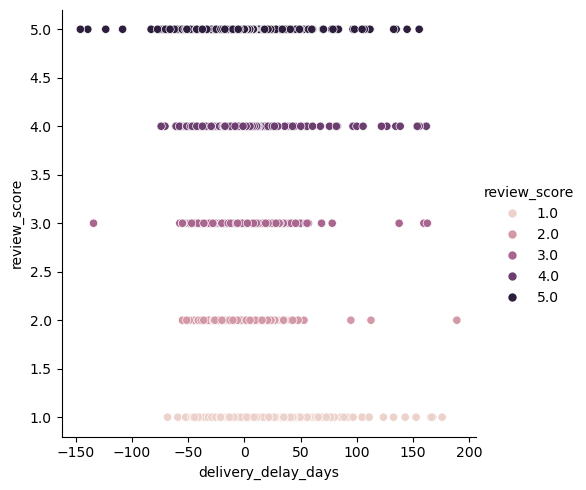

In [102]:
sns.relplot(x='delivery_delay_days',y='review_score',hue='review_score',data=orders)
plt.show()

In [103]:
orders.to_csv('olist_orders_cleaned.csv', index=False)
items.to_csv('olist_items_cleaned.csv', index=False)
products.to_csv('olist_products_cleaned.csv', index=False)
customers.to_csv('olist_customers_cleaned.csv', index=False)
